# Importing Libraries

In [21]:
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.optimizers import RMSprop
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os

# Loading Dataset 
From our system with the help of OS library

In [2]:
img = image.load_img('/Users/musubimanagement/Desktop/Mask_detection/Train/with_mask/pic-1.jpg')

# Analysing Dataset

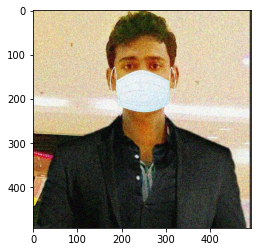

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("/Users/musubimanagement/Desktop/Mask_detection/Train/with_mask/pic-1.jpg").shape

(493, 493, 3)

# Spliting Data set to feed our model
Resizing the images.

In [5]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

In [6]:
train_data = train.flow_from_directory('/Users/musubimanagement/Desktop/Mask_detection/Train',
                                       target_size=(200,200),
                                      class_mode='binary',
                                      batch_size = 25)
validation_data = validation.flow_from_directory('/Users/musubimanagement/Desktop/Mask_detection/validation',
                                       target_size=(200,200),
                                      class_mode='binary',
                                      batch_size = 25)

Found 1099 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'with_mask': 0, 'without_mask': 1}

# Creating Layers
Convolution layers, Max pool Layers, Dense Layers in a Sequence.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =16,kernel_size= (3,3),activation= 'relu',input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters =32,kernel_size= (3,3),activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters =64,kernel_size= (3,3),activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 500,activation= 'relu'),
    tf.keras.layers.Dense(units = 500,activation= 'relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


# Compiling and training our model.
Training Our Model With 10 Epochs.

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model_f = model.fit(x = train_data,steps_per_epoch=3,epochs=10,validation_data= validation_data)

Epoch 1/10
3/3 [==============================] - 5s 2s/step - loss: 0.1655 - accuracy: 0.9067 - val_loss: 0.1443 - val_accuracy: 0.9604
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.1962 - accuracy: 0.9067 - val_loss: 0.2159 - val_accuracy: 0.9137
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.1780 - accuracy: 0.9467 - val_loss: 0.1167 - val_accuracy: 0.9568
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.1287 - accuracy: 0.9600 - val_loss: 0.2172 - val_accuracy: 0.9209
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.1070 - accuracy: 0.9600 - val_loss: 0.1166 - val_accuracy: 0.9640
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.0689 - accuracy: 0.9867 - val_loss: 0.1098 - val_accuracy: 0.9640
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.0688 - accuracy: 0.9733 - val_loss: 0.1186 - val_accuracy: 0.9640
Epoch 8/10
3/3 [=========================

# Result
We Installed natsort which helped us to sort ALPHA_NUMERIC VALUES.

In [41]:
#pip install natsort
from natsort import natsorted

In [53]:
path ='/Users/musubimanagement/Desktop/Mask_detection/Test'
images=natsorted(os.listdir(path))
result = []
name = []
for i in images:
    if i == ".DS_Store":
        pass
    else:
        im = image.load_img(path+"/"+i,target_size=(200,200))
        x = image.img_to_array(im)
        x = np.expand_dims(x,axis=0)
        pred = model.predict(x)
        if pred == 0:
            name.append(i)
            result.append('With_Mask')
        else:
            name.append(i)
            result.append('Without_Mask')
        

# Creating Dataset

In [54]:
res = pd.DataFrame(name,columns=["Img_Name"])
res["Prediction"] = result

In [55]:
res.to_csv('MD_Answer.csv',index = False)

In [56]:
pd.read_csv("MD_Answer.csv")

,Img_Name,Prediction
0,pic-1.jpg,With_Mask
1,pic-2.jpg,Without_Mask
2,pic-3.jpg,Without_Mask
3,pic-4.jpg,With_Mask
4,pic-5.jpg,Without_Mask
...,...,...
98,pic-99.jpg,Without_Mask
99,pic-100.jpg,Without_Mask
100,pic-101.jpg,With_Mask
101,pic-102.jpg,With_Mask


                                                 ~~~END~~~